In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
food=pd.read_csv('/content/drive/MyDrive/Data/food_consumption.csv',index_col=0)
print(food.head(33))

      country food_category  consumption  co2_emission
1   Argentina          pork        10.51         37.20
2   Argentina       poultry        38.66         41.53
3   Argentina          beef        55.48       1712.00
4   Argentina     lamb_goat         1.56         54.63
5   Argentina          fish         4.36          6.96
6   Argentina          eggs        11.39         10.46
7   Argentina         dairy       195.08        277.87
8   Argentina         wheat       103.11         19.66
9   Argentina          rice         8.77         11.22
10  Argentina      soybeans         0.00          0.00
11  Argentina          nuts         0.49          0.87
12  Australia          pork        24.14         85.44
13  Australia       poultry        46.12         49.54
14  Australia          beef        33.86       1044.85
15  Australia     lamb_goat         9.87        345.65
16  Australia          fish        17.69         28.25
17  Australia          eggs         8.51          7.82
18  Austra

# **Central Tendency**

---



### **Mean, Median, Mode**

1) Subset food for rows with data about Belgium and the USA.

2) Group the subsetted data by country and select only the consumption column. Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [30]:
#1
bel_usa=food[(food['country']=='Belgium')|(food['country']=='USA')]
print(bel_usa)

     country food_category  consumption  co2_emission
56       USA          pork        27.64         97.83
57       USA       poultry        50.01         53.72
58       USA          beef        36.24       1118.29
59       USA     lamb_goat         0.43         15.06
60       USA          fish        12.35         19.72
61       USA          eggs        14.58         13.39
62       USA         dairy       254.69        362.78
63       USA         wheat        80.43         15.34
64       USA          rice         6.88          8.80
65       USA      soybeans         0.04          0.02
66       USA          nuts         7.86         13.91
397  Belgium          pork        38.65        136.80
398  Belgium       poultry        12.20         13.11
399  Belgium          beef        15.63        482.31
400  Belgium     lamb_goat         1.32         46.23
401  Belgium          fish        18.97         30.29
402  Belgium          eggs        12.59         11.57
403  Belgium         dairy  

In [31]:
#2
print(bel_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


## **Mean vs Median**

1) Subset food to get the rows where food_category is 'rice'. Create a histogram of co2_emission for rice and show the plot.

2) Use .agg() to calculate the mean and median of co2_emission for rice.

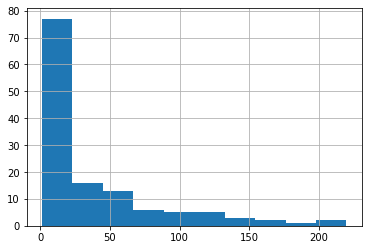

In [32]:
#1
rice_co2=food[food['food_category']=='rice']['co2_emission']
rice_co2.hist()
plt.show()

Remember that left-skewed means the data has a tail on the left side and is piled up higher on the right and vice varsa. So this is a right-skewed.

In [33]:
#2
print(rice_co2.agg([np.mean,np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


So, Median is best central tendency to summarize this left-skewed data.

# **Measure of Dispersion**

---



# **Quantile**

Quartile= dataset split into 4 parts.

Quintile= dataset split into 5 parts.

Decile= dataset split into 10 parts.

Percentile= dataset split into 100 parts.

### **Quantiles using np.linspace()**

`np.linspace(start, stop, num)`

1)Calculate the quartiles of the co2_emission column of food.

2) Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food.

3) Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

4) Compute the first, second and third quartiles of the co2_emission column of food.

In [34]:
#1 quartile is 4 parts
print(np.quantile(food['co2_emission'],np.linspace(0,1,5)))

[   0.        5.21     16.53     62.5975 1712.    ]


In [35]:
#2 quintile is 5 parts
print(np.quantile(food['co2_emission'],np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [36]:
#3 decile is 10 parts
print(np.quantile(food['co2_emission'],np.linspace(0,1,11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [37]:
#4 1st, 2nd, 3rd quartile
print('q1=',np.quantile(food['co2_emission'],0.25))
print('q2=',np.quantile(food['co2_emission'],0.5))
print('q3=',np.quantile(food['co2_emission'],0.75))

q1= 5.21
q2= 16.53
q3= 62.597500000000004


# **Variance & Standard Deviation**

---



1) Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.

2) Create a histogram of co2_emission for the beef food_category and show the plot.

3) Create a histogram of co2_emission for the eggs food_category and show the plot.

In [39]:
#1
print(food.groupby('food_category')['co2_emission'].agg([np.var,np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


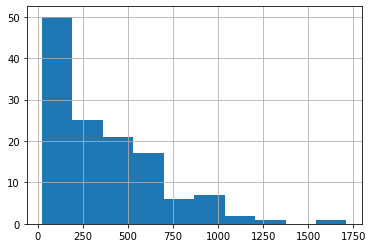

In [40]:
#2
food[food['food_category']=='beef']['co2_emission'].hist()
plt.show()

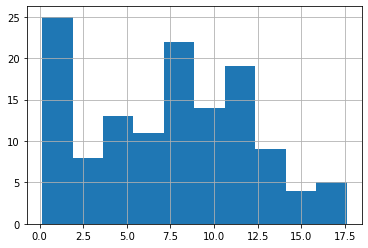

In [41]:
#3
food[food['food_category']=='eggs']['co2_emission'].hist()
plt.show()

# **Finding outliers using IQR**

---

### **Interquartile range (IQR)**

Height of the box in a boxplot. 

**IQR = 3rd quartile - 1st quartile**


---



## **Outliers**

---


Data point that is substantially different from the others. 

How do we know what a substantial difference is? 

A data point is an outlier if: 

`data < Q1 − 1.5 × IQR or data > Q3 + 1.5 × IQR`

**Steps for finding outliers are:**

1) Find 1st & 3rd Quartile of a selected column_name

2) Find IQR = Q3 - Q1 of the column_name

3) Find lower & upper cutoffs:

    lower=Q1-1.5 * IQR
    upper=Q3+1.5 * IQR
4) Subset row of that column_name:

    df[(df['column_name']<lower) | (df['column_name']>upper)]



---


1) Find out the total co2 emission by every country.

2) Find out the outliers in total co2 emission by every country if there is any.

In [43]:
#1
total_co2=food.groupby('country')['co2_emission'].agg(np.sum)
print(total_co2.to_string())

country
Albania                   1777.85
Algeria                    707.88
Angola                     412.99
Argentina                 2172.40
Armenia                   1109.93
Australia                 1938.66
Austria                   1211.16
Bahamas                   1192.90
Bangladesh                 374.18
Barbados                   889.11
Belarus                    960.22
Belgium                   1102.09
Belize                     433.08
Bermuda                   1483.28
Bolivia                    873.03
Bosnia and Herzegovina     628.18
Botswana                   576.84
Brazil                    1616.73
Bulgaria                   560.16
Cambodia                   452.41
Cameroon                   283.61
Canada                    1437.16
Chile                     1099.57
China                      640.19
Colombia                   781.53
Congo                      262.55
Costa Rica                 891.27
Croatia                    996.15
Cuba                       591.69
Cyprus

In [46]:
#2 finding outliers
Q1=np.quantile(total_co2,0.25)
print('Q1=',Q1)
Q3=np.quantile(total_co2,0.75)
print('Q3=',Q3)
iqr=Q3-Q1
print('iqr=',iqr)

Q1= 446.66
Q3= 1111.1525000000001
iqr= 664.4925000000001


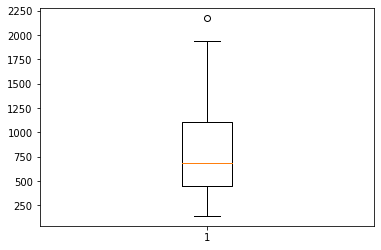

In [55]:
plt.boxplot(total_co2)
plt.show()

In [47]:
# Calculate the lower and upper cutoffs for outliers
lower=Q1-1.5*iqr
upper=Q3+1.5*iqr

# Subset total_co2 to find outliers
outliers=total_co2[(total_co2<lower)|(total_co2>upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## **Is there any outliers in total consumptions according to country?**

In [48]:
consum=food.groupby('country')['consumption'].agg(np.sum)
print(consum)

country
Albania      532.73
Algeria      364.51
Angola       115.99
Argentina    429.41
Armenia      407.11
              ...  
Uruguay      433.60
Venezuela    277.39
Vietnam      268.74
Zambia        57.11
Zimbabwe      96.56
Name: consumption, Length: 130, dtype: float64


In [51]:
q_1=np.quantile(consum,0.25)
print(q_1)
q_3=np.quantile(consum,0.75)
print(q_3)
Iqr=q_3-q_1
print(Iqr)

213.105
422.6525
209.54749999999999


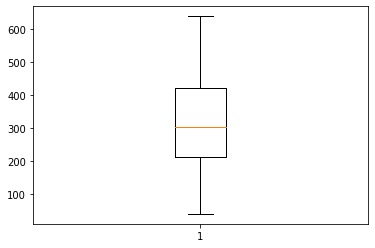

In [53]:
plt.boxplot(consum)
plt.show()

In [56]:
low=q_1-1.5*Iqr
up=q_3+1.5*Iqr
Outlier=consum[(consum<low)|(consum>up)]
print(Outlier)

Series([], Name: consumption, dtype: float64)


So, there is no outliers in consumption column.